In [4]:
# Some useful packages
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf
import keras

Using TensorFlow backend.


In [25]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [26]:
# Random Forest
# ARIMA
# LSTM

In [27]:
data = pd.read_csv('data/full.csv')

In [28]:
data.head()

,Unnamed: 0,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 13 columns):
Unnamed: 0         5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
Temperature        5132 non-null object
Dew Point          5132 non-null object
Humidity           5132 non-null object
Wind               5132 non-null object
Wind Speed         5132 non-null object
Wind Gust          5132 non-null object
Pressure           5132 non-null object
State Holiday      5132 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 521.8+ KB


In [30]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [31]:
data.head()

,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [ ]:
#df[0:4110].to_csv('train.csv')

In [ ]:
#df[4110:5137].to_csv('test.csv')

In [ ]:
#5137 -> 
# 80% = 4110 samples
# 20% = 1027 samples

# Feature Modifications

In [32]:
data['Dew Point'] = data['Dew Point'].str.replace('F', '')
data['Temperature'] = data['Temperature'].str.replace('F', '')
data['Humidity'] = data['Humidity'].str.replace('%', '')
data['Wind Speed'] = data['Wind Speed'].str.replace('mph', '')
data['Pressure'] = data['Pressure'].str.replace('in', '')
data['Wind Gust'] = data['Wind Gust'].str.replace('mph', '')


In [33]:
data.set_index('Datetime',inplace=True)

In [34]:
cols = ['Temperature', 'Dew Point', 'Humidity','Wind Speed','Wind Gust','Pressure']
data[cols] = data[cols].apply(pd.to_numeric)


In [35]:
data.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43.0,37.0,81.0,NW,9.0,0.0,30.3,1.0
2017-01-01 04:00:00,Sunday,Night,1,41.0,36.0,81.0,NW,9.0,0.0,30.3,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41.0,36.0,81.0,NW,12.0,0.0,30.3,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41.0,36.0,81.0,NW,14.0,0.0,30.3,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39.0,34.0,81.0,NW,13.0,0.0,30.3,1.0


In [ ]:
#train_X = train[['Weekday','Part of the day', 
 #                'Temperature', 'Humidity',
  #               'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 7 

#train_y = train['counts']

In [ ]:
#use temporarily because of issue with reshaping
#train_X = train[[ 'Temperature', 'Humidity',
 #                'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 5

#train_y = train['counts']

#test_X = test[[
 #                'Temperature', 'Humidity',
  #               'Wind Speed', 'Wind Gust', 'State Holiday']]
#test_Y = test['counts']

# Single Feature Rolling Forecast ARIMA

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
df = data[['counts']]

In [39]:
df.head()

,counts
Datetime,
2017-01-01 02:00:00,1
2017-01-01 04:00:00,1
2017-01-01 06:00:00,1
2017-01-01 07:00:00,2
2017-01-01 10:00:00,2


In [58]:
 #create the plot space upon which to plot the data

ranged = df.loc['2017-01-01':'2017-01-07']

Text(0, 0.5, 'Number of Accidents')

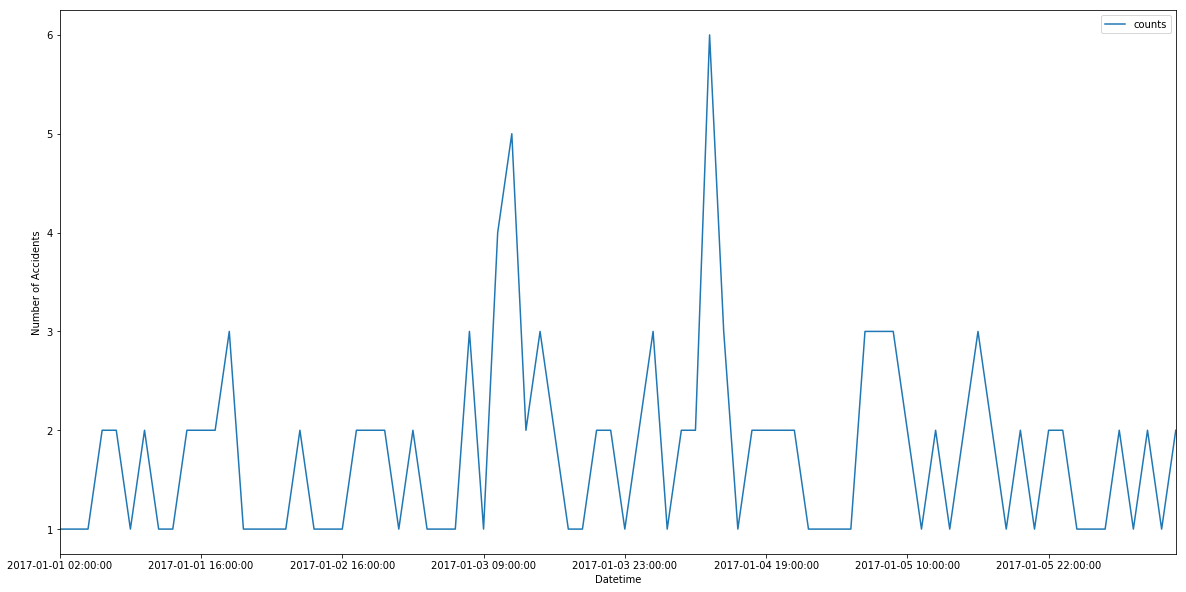

In [64]:
graph = ranged.plot(figsize=(20,10))
graph.set_ylabel("Number of Accidents")

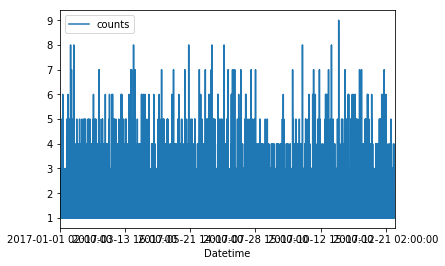

In [49]:
df.plot()

In [14]:
X = df.values
size = int(len(X) *0.66) #66/34 train/split

In [15]:
train, test = X[0:size], X[size:len(X)]


In [16]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0].round()
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=5.000000
predicted=3.

predicted=2.000000, expected=4.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=4.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=4.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=5.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.

predicted=3.000000, expected=6.000000
predicted=4.000000, expected=3.000000
predicted=3.000000, expected=4.000000
predicted=4.000000, expected=2.000000
predicted=3.000000, expected=5.000000
predicted=4.000000, expected=1.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=4.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.

predicted=1.000000, expected=2.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=4.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.

predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=5.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=4.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=9.000000
predicted=4.

predicted=3.000000, expected=3.000000
predicted=3.000000, expected=3.000000
predicted=4.000000, expected=5.000000
predicted=4.000000, expected=2.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=4.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=4.000000
predicted=2.000000, expected=6.000000
predicted=4.000000, expected=1.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.

predicted=4.000000, expected=4.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=3.000000, expected=4.000000
predicted=4.000000, expected=5.000000
predicted=4.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=1.000000
predicted=3.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=4.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=5.000000
predicted=3.000000, expected=3.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=3.000000, expected=1.000000
predicted=2.

predicted=2.000000, expected=3.000000
predicted=2.000000, expected=5.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=2.000000
predicted=2.000000, expected=5.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=3.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=5.000000
predicted=3.000000, expected=4.000000
predicted=3.000000, expected=2.000000
predicted=3.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=1.

predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.000000, expected=3.000000
predicted=2.000000, expected=4.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=1.000000
predicted=2.000000, expected=2.000000
predicted=2.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000


In [17]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)

from math import sqrt
rms = sqrt(error) #root mean squared error

In [18]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
from math import sqrt
rms = sqrt(error) #root mean squared error

In [67]:
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rms)

Test MSE: 1.805
Test RMSE: 1.344


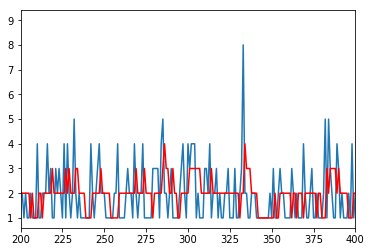

In [20]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlim(200, 400)
plt.show()

# Holts-Winter

# Random Forest - Multivariate

In [ ]:
# https://pythondata.com/forecasting-with-random-forests/

In [68]:
X = df.values
size = int(len(X) *0.66) #66/34 train/split

In [69]:
train, test = X[0:size], X[size:len(X)]

In [70]:
from sklearn.ensemble.forest import RandomForestRegressor
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

In [ ]:
# let's get the labels and features in order to run our 
# model fitting
labels = y_train #[:, None]
features = X_train[:, None]

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

# LSTM 1

In [ ]:
# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [95]:
dataf = data[['Temperature', 'Humidity','Wind Speed', 'Wind Gust', 'State Holiday','counts']]

In [96]:
dataf.head()

,Temperature,Humidity,Wind Speed,Wind Gust,State Holiday,counts
Datetime,,,,,,
2017-01-01 02:00:00,43.0,81.0,9.0,0.0,1.0,1
2017-01-01 04:00:00,41.0,81.0,9.0,0.0,1.0,1
2017-01-01 06:00:00,41.0,81.0,12.0,0.0,1.0,1
2017-01-01 07:00:00,41.0,81.0,14.0,0.0,1.0,2
2017-01-01 10:00:00,39.0,81.0,13.0,0.0,1.0,2


In [97]:
values = dataf.values

In [100]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [101]:
dataf = data[['Temperature', 'Humidity','Wind Speed', 'Wind Gust', 'State Holiday','counts']]


In [102]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [103]:

reframed = series_to_supervised(scaled,1,1)
print(reframed.head())

   var1(t-1)  var1(t)
1      0.000    0.000
2      0.000    0.000
3      0.000    0.125
4      0.125    0.125
5      0.125    0.000


In [104]:
values = reframed.values
n_train_hours = 82*50
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

#split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshape to 3d
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X =test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape,train_y.shape, test_X.shape, test_y.shape)

(4100, 1, 1) (4100,) (1036, 1, 1) (1036,)


In [105]:
print("X_train size", train_X.shape)
print("y_train size", train_y.shape)

print("X_test size", test_X.shape)
print("y_test size", test_y.shape)


X_train size (4100, 1, 1)
y_train size (4100,)
X_test size (1036, 1, 1)
y_test size (1036,)


Epoch 1/100
 - 1s - loss: 0.0261 - mean_squared_error: 0.0261 - acc: 0.4588
Epoch 2/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 3/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 4/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 5/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 6/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 7/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 8/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 9/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 10/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 11/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 12/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 13/100
 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - acc: 0.4588
Epoch 14

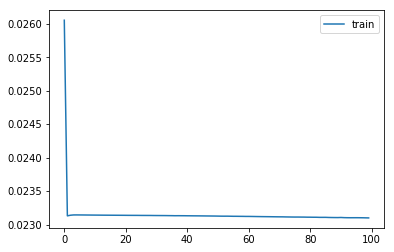

In [106]:
# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error','accuracy'])
# fit network
#history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history = model.fit(train_X, train_y, epochs=100, batch_size=72, verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#accuracy


In [107]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [108]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [109]:
yhat = model.predict(test_X)
 
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#print(test_X.shape)



In [110]:
# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]



In [111]:
print(inv_yhat.shape)
print(inv_y.shape)

(1036,)
(1036,)


In [112]:
# calculate RMSE
mse = mean_squared_error(test_y, yhat)
print('Test MSE', rmse)

Test MSE 0.025496004


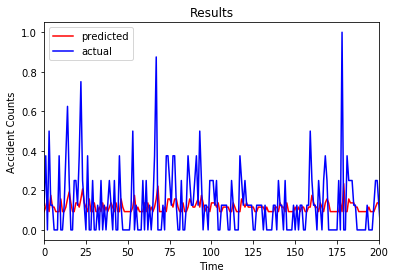

In [113]:
#plot yhat and testy
plt.plot(yhat,color='red', label='predicted')
plt.plot(test_y,color='blue',label='actual')
plt.title('Results')
plt.xlabel('Time')    
plt.ylabel('Accident Counts')
plt.legend()
plt.xlim(0,200)

plt.show()

# Custom LSTM

In [116]:
#use temporarily because of issue with reshaping
data3 = dataf[['Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 5

#train_y = train['counts']

#test_X = test[[
              #   'Temperature', 'Humidity',
               #  'Wind Speed', 'Wind Gust', 'State Holiday']]
#test_Y = test['counts']

In [117]:

#Rakshit's model
    
#inp = kl.Input((None,))
#x = kl.LSTM(128, return_sequences=True)(x)
#x = kl.GlobalMaxPool1D()(x)
#x = kl.Dense(64, activation='sigmoid')(x)
#out = kl.Dense(n_classes, activation='sigmoid')(x)

#model = keras.Model(inputs=inp, outputs=out)
#model.summary()


In [119]:
data3.head()

,Temperature,Humidity,Wind Speed,Wind Gust,State Holiday
Datetime,,,,,
2017-01-01 02:00:00,43.0,81.0,9.0,0.0,1.0
2017-01-01 04:00:00,41.0,81.0,9.0,0.0,1.0
2017-01-01 06:00:00,41.0,81.0,12.0,0.0,1.0
2017-01-01 07:00:00,41.0,81.0,14.0,0.0,1.0
2017-01-01 10:00:00,39.0,81.0,13.0,0.0,1.0


In [120]:
# keep datetime feature as a column
# sin(2pih/24)

In [121]:
# StandardScaler instead of minmax because minmax is prone to deviation

In [123]:
#use full.csv
values3 = data3.values
values3 = values3.astype('float32')
values3

array([[43., 81.,  9.,  0.,  1.],
       [41., 81.,  9.,  0.,  1.],
       [41., 81., 12.,  0.,  1.],
       ...,
       [61., 45., 20.,  0.,  0.],
       [61., 48., 12.,  0.,  0.],
       [61., 48., 12.,  0.,  0.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#MinMaxScaler
scaled_data = scaler.fit_transform(values)

In [ ]:
scaled_data.shape

In [ ]:
y_temp = full['counts'].values
y_temp.shape

In [ ]:
y = np.array(y_temp)

In [ ]:
#y = y_temp.reshape((-1, 1))

In [ ]:
y.shape

In [ ]:
def window_data(data, window_size):
    X = []
    
    i = 0
    while (i+ window_size) < len(data) :
        X.append(data[i:i+window_size])
        i+=1
    return X


In [ ]:
X = window_data(scaled_data, 14)

In [ ]:
len(X)

In [ ]:
#window size
import numpy as np
X_train = np.array(X[:4110])
y_train = np.array(y[:4110])

X_test = np.array(X[4110:])
y_test = np.array(y[4110:5123])


In [ ]:
print("X_train size", X_train.shape)
print("y_train size", y_train.shape)

print("X_test size", X_test.shape)
print("y_test size", y_test.shape)


In [ ]:
print(X_test.shape[0])

In [ ]:
# define variables
batch_size = 14
window_size = 14


In [ ]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_test.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#accuracy


In [ ]:
 
#print(test_X.shape)





# Attempt 3

In [ ]:
data = full[['Temperature']]
#counts

In [ ]:
full.head()

In [ ]:
input_features = data.values
input_data = input_features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
input_data = sc.fit_transform(input_data)

In [ ]:
input_data.shape

In [ ]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i+ window_size) <= len(data) -1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        i+=1
    assert len(X) == len(y)
    return X, y

In [ ]:
scaled

In [ ]:
lookback = 14
test_size = int(.2 * len(data))

X=[]
y=[]

for i in range(len(data)-lookback-1):
    t =[]
    for j in range(0,lookback):
        t.append(input_data[[(i+j)],:])
    X.append(t)
    y.append(input_data[i+lookback,1])

In [ ]:
X,y = np.array(X) , np.array(y)
X_test =  X[:test_size+lookback]

feature_size = 5

X = X.reshape(X.shape[0],lookback,feature_size)
X_test = X_test.reshape(X_test.shape[0],lookback, feature_size)

In [ ]:
print(X.shape)
print(X_test.shape)

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X.shape[1],feature_size)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(X,y,epochs=100,batch_size=2)


# GRU

In [ ]:
inp = kl.Input((None,))
x = kl.GRU(128, return_sequences=True)(x)
x = kl.GlobalMaxPool1D()(x)
x = kl.Dense(64, activation='sigmoid')(x)
out = kl.Dense(n_classes, activation='sigmoid')(x)
    
model = keras.Model(inputs=inp, outputs=out)
model.summary()

In [ ]:
# try linear regression, try ARIMA, try random forest
# mpe for metrics?

# Evaluation

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics ='')


In [ ]:
model.fit(train_X, train_y, epochs=200, batch_size=32)
